### EDA with Python and applying Logistics Regression

We will be trying to predict a classification-survival or deseased. 

### Import Libraries

In [89]:
#importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [90]:
train = pd.read_csv("C:\\Users\\bened\\Documents\\Future Interns\\FUTURE_DS_01\\Titanic_Project\\train.csv")

In [91]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Exploratory Data Analysis

### Checking for Missing Data

In [92]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


using seaborn to create a simple heatmap to see where we are missing data

<AxesSubplot:>

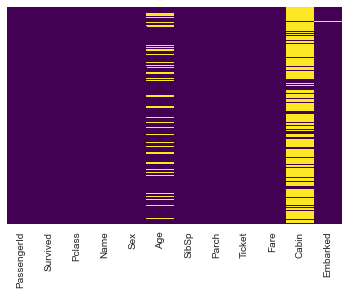

In [93]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False,cmap='viridis')

Text(0.5, 1.0, 'Percentage of Missing Values by Column')

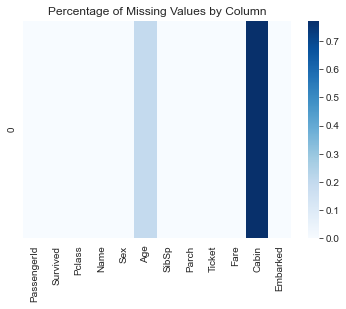

In [94]:
sns.heatmap(train.isnull().mean().to_frame().T, cmap='Blues', cbar=True)
plt.title("Percentage of Missing Values by Column")

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<AxesSubplot:xlabel='Survived', ylabel='count'>

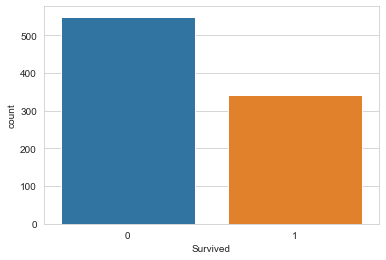

In [95]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

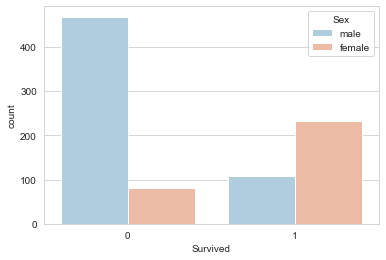

In [96]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

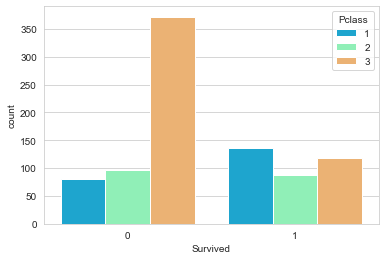

In [97]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

C:\Users\bened\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

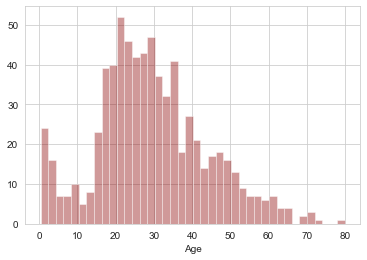

In [98]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=40)

<AxesSubplot:>

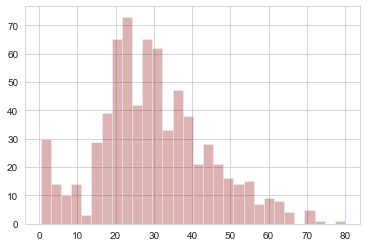

In [99]:
train['Age'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

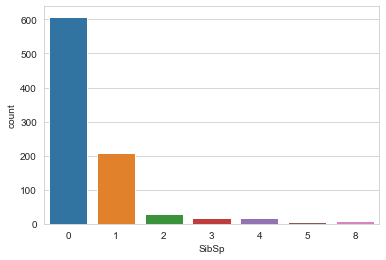

In [100]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

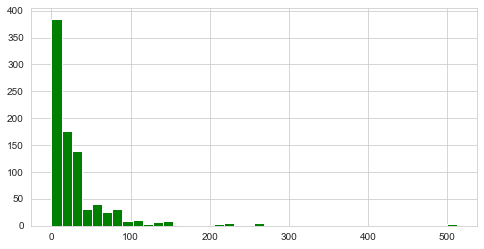

In [101]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Data Cleaning


 Filling in missing age data instead of just dropping the missing age data rows. filling in the mean age of all the passengers (imputation).

check the average age by passenger class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

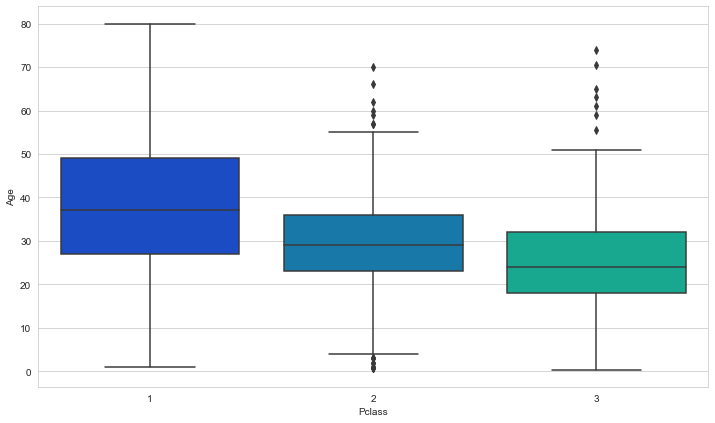

In [102]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [103]:
def impute_age(cols):
    Age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(Age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


 dropping the Cabin column 

<AxesSubplot:>

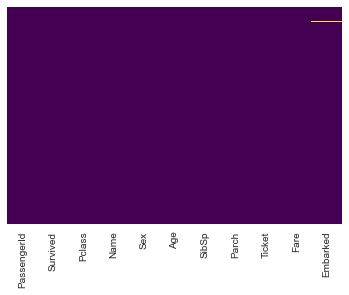

In [115]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

#checking heatmap

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


## Converting Categorical Features

converting categorical features to dummy variables using pandas

In [120]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [122]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [124]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [125]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [126]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [127]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [128]:
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [129]:
train = pd.concat([train,sex,embark],axis=1)


In [130]:
train.head()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Building a Logistic Regression model


splitting our data into a training set and test set 

### Train Test Split


In [131]:
train.drop('Survived',axis=1).head()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [132]:
train['Survived'].head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

### Training and Predicting


In [137]:
from sklearn.linear_model import LogisticRegression

In [139]:
logmodel = LogisticRegression(solver='liblinear', max_iter=500)
logmodel.fit(X_train, y_train)


LogisticRegression(max_iter=500, solver='liblinear')

In [140]:
predictions = logmodel.predict(X_test)


In [141]:
from sklearn.metrics import confusion_matrix


In [142]:
accuracy=confusion_matrix(y_test,predictions)
accuracy


array([[151,  12],
       [ 36,  68]], dtype=int64)

In [143]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,predictions)
accuracy

0.8202247191011236

In [144]:
predictions


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

## Evaluation

We can check precision,recall,f1-score using classification report!



In [147]:
from sklearn.metrics import classification_report


In [148]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



## XBoost 

In [153]:
from sklearn.model_selection import RandomizedSearchCV

# Randomized Search for Hyperparameter Tuning
random_search = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, 
                                   n_iter=10, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters from RandomizedSearchCV: ", random_search.best_params_)

# Best Model
best_logreg_random = random_search.best_estimator_
y_pred_random = best_logreg_random.predict(X_test)

# Evaluate the Model
accuracy_random = accuracy_score(y_test, y_pred_random)
print(f'Accuracy from RandomizedSearchCV: {accuracy_random * 100:.2f}%')


NameError: name 'logreg' is not defined